In [52]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import f_classif, chi2, f_regression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [53]:
cols=[*range(1, 75, 1)] #72 es clase
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiRef.csv', sep=',',usecols=cols)
df_ref.head()

,NumTiny,NumSmall,NumAliphatic,NumAromatic,NumNonPolar,NumPolar,NumCharged,NumBasic,NumAcidic,PorcTiny,...,z3,z4,z5,HydrophobicityIndex,AlphaAndTurnPropensities,BulkyProperties,CompositionalCharacteristicIndex,LocalFlexibility,ElectronicProperties,Class
0,2,4,2,3,6,2,1,1,0,25.000,...,-0.061250,0.018750,-0.046250,-0.093125,-0.210750,0.234625,0.298250,-0.335375,0.209250,1
1,4,6,0,0,3,5,1,1,0,50.000,...,0.526250,-0.357500,-0.190000,-0.219125,-0.360250,-0.601125,-0.515625,0.216875,0.250875,1
2,3,4,2,1,4,4,1,1,0,37.500,...,-0.003750,-0.027500,0.406250,0.076625,-0.376250,0.021375,0.257375,0.322625,0.039875,1
3,3,6,4,0,6,3,0,0,0,33.333,...,-0.462222,-0.668889,0.240000,-0.124333,0.026333,-0.225778,0.744667,-0.097889,0.031889,1
4,3,4,4,2,8,1,0,0,0,33.333,...,-0.501111,-0.572222,-0.053333,0.516000,-0.107222,0.110444,0.923889,-0.160222,-0.062444,1


In [54]:
label_encoder = preprocessing.LabelEncoder() #Encode target labels with value between 0 and n_classes-1. Para valores str
df_ref['Class']= label_encoder.fit_transform(df_ref['Class']) #Fit label encoder and return encoded labels.
print(df_ref['Class'])
df_ref

0       1
1       1
2       1
3       1
4       1
       ..
2046    0
2047    0
2048    0
2049    0
2050    0
Name: Class, Length: 2051, dtype: int64


,NumTiny,NumSmall,NumAliphatic,NumAromatic,NumNonPolar,NumPolar,NumCharged,NumBasic,NumAcidic,PorcTiny,...,z3,z4,z5,HydrophobicityIndex,AlphaAndTurnPropensities,BulkyProperties,CompositionalCharacteristicIndex,LocalFlexibility,ElectronicProperties,Class
0,2,4,2,3,6,2,1,1,0,25.000,...,-0.061250,0.018750,-0.046250,-0.093125,-0.210750,0.234625,0.298250,-0.335375,0.209250,1
1,4,6,0,0,3,5,1,1,0,50.000,...,0.526250,-0.357500,-0.190000,-0.219125,-0.360250,-0.601125,-0.515625,0.216875,0.250875,1
2,3,4,2,1,4,4,1,1,0,37.500,...,-0.003750,-0.027500,0.406250,0.076625,-0.376250,0.021375,0.257375,0.322625,0.039875,1
3,3,6,4,0,6,3,0,0,0,33.333,...,-0.462222,-0.668889,0.240000,-0.124333,0.026333,-0.225778,0.744667,-0.097889,0.031889,1
4,3,4,4,2,8,1,0,0,0,33.333,...,-0.501111,-0.572222,-0.053333,0.516000,-0.107222,0.110444,0.923889,-0.160222,-0.062444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,4,12,2,1,5,8,2,0,2,30.769,...,0.366154,-1.019231,0.513846,-0.642615,-0.677462,-0.326923,0.136769,0.399308,-0.224769,0
2047,6,8,3,1,7,7,2,1,1,42.857,...,-0.079286,-0.364286,0.172143,-0.278143,0.123571,-0.267429,0.236000,0.245857,-0.016714,0
2048,2,5,3,2,5,3,2,0,2,25.000,...,0.247500,-1.018750,0.042500,-0.502875,0.180375,0.014250,0.444250,-0.127250,-0.172875,0
2049,1,4,2,2,5,3,1,0,1,12.500,...,-0.277500,-0.192500,-0.383750,-0.351875,0.123750,0.364875,-0.123625,-0.284750,0.117500,0


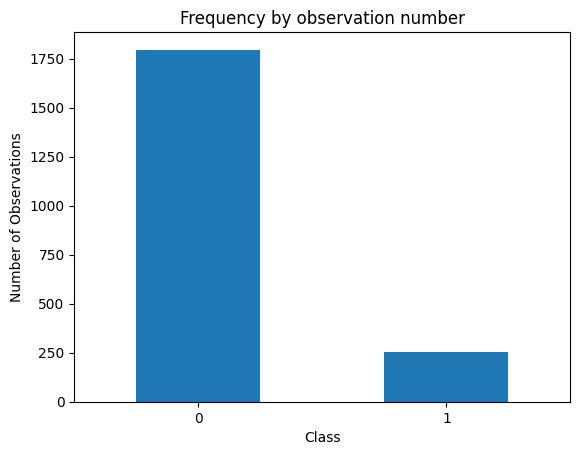

In [55]:
count_classes = pd.value_counts(df_ref['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [56]:
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
X=df_ref[feature_cols]
Y=df_ref.Class
X_p=preprocessing.normalize(X)


SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.8850608272506082, 0.6980778588807788, 0.8934549878345499, 0.8679318734793188] [0.015369427373140855, 0.02231581306372869, 0.01539703891377474, 0.016530980166731785]
[0.15627927165540842, 0.8008772141719196, 0.16822075001814413, 0.3098474131060602] [0.05046676388161415, 0.05453300548883198, 0.0444663340465908, 0.09770985412786656]
[0.7137573825727075, 0.2653406774236871, 0.912512876012876, 0.45328446459671284] [0.1375885563907313, 0.03592233244101034, 0.09854022776710546, 0.0906109676282647]


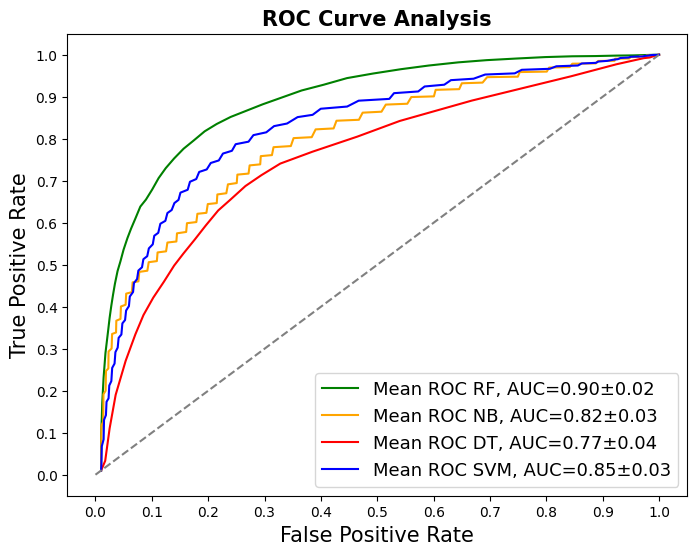

In [57]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
feature_coll = ['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']

graph_acc = []; Acc = []; Rec = []; Pre = []; acc = []; rec = []; pre = []; acc_std = []
rec_std = []; pre_std = []; Std = []; Mean = []; Fpr = []; Tpr = []; Auc = []; Auc2 = []
Auc3 = []; Auc4 = []
fc = []
mean_tpr=[]
W_range = range(0, 100)
X_range = range(0, 400, 100)
Y_range = range(0, 100,1)

for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:
        fpr_all=[]
        tpr_all=[]
        X_train, X_test, y_train, y_test = train_test_split(X_p,Y, test_size=0.20)#,random_state=123)
        model = cls.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   
##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)
fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
#plt.savefig('ROC_curve_NegEpi_RefPaper_NonBalanced.png')
plt.show()

      PorcTiny  PorcSmall  PorcAliphatic  PorcAromatic  PorcNonPolar  \
0       25.000     50.000         25.000        37.500        75.000   
1       50.000     75.000          0.000         0.000        37.500   
2       37.500     50.000         25.000        12.500        50.000   
3       33.333     66.667         44.444         0.000        66.667   
4       33.333     44.444         44.444        22.222        88.889   
...        ...        ...            ...           ...           ...   
1031    33.333     33.333         33.333        16.667        50.000   
2049    12.500     50.000         25.000        25.000        62.500   
398     66.667     73.333         20.000        26.667        86.667   
1701    36.842     57.895         26.316        21.053        47.368   
257     50.000     75.000         62.500         0.000       100.000   

      PorcPolar  PorcCharged  PorcBasic  PorcAcidic    at_index  ...  \
0        25.000       12.500     12.500       0.000   48.750000

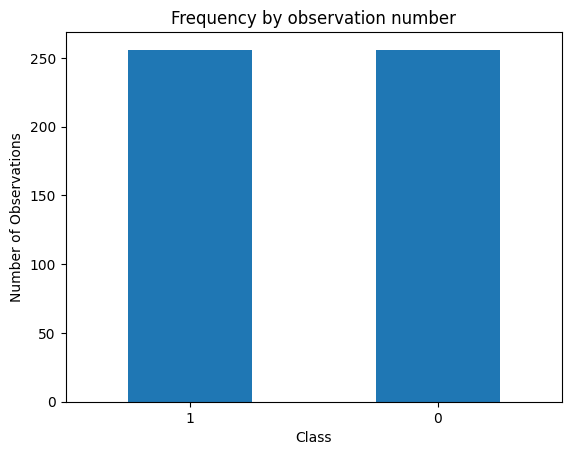

In [30]:
df2=df_ref.iloc[np.random.random_integers(256,2051,256),0:74] #0:62
df3=df_ref.iloc[0:256,0:74] #0:62
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
print(Xrandom)
Yrandom=df4.Class
X_prandom=preprocessing.normalize(Xrandom)
count_classes = Yrandom.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");


SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.6888349514563107, 0.7231067961165049, 0.8110679611650485, 0.7231067961165047] [0.05008005656174558, 0.049590271456139444, 0.03672470463631995, 0.04498572788200502]
[0.7449525218384643, 0.8358964718669304, 0.8037369403731367, 0.6440202753596574] [0.06763195327866449, 0.057574716830957245, 0.057225334088472884, 0.08828570966803934]
[0.671075862063709, 0.682058975600212, 0.8205678839760806, 0.7739764832264584] [0.0687222692559354, 0.059470508968697516, 0.05642762936276523, 0.07911169587487712]


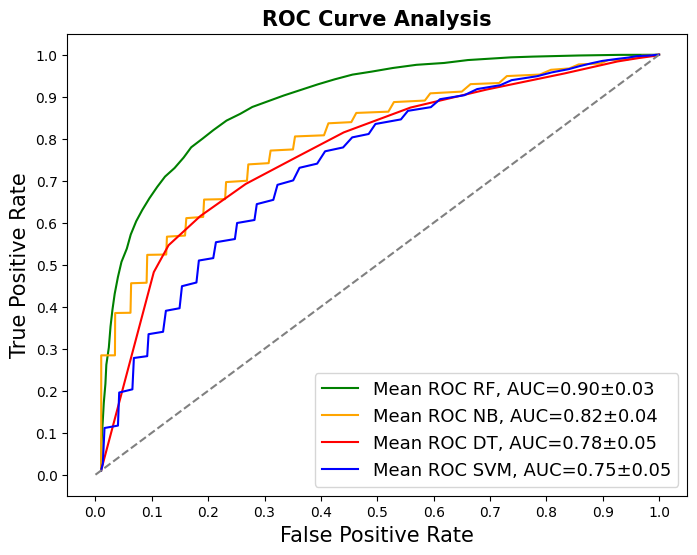

In [58]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
feature_coll = ['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']

graph_acc = []
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];
pre_std = [];Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];
mean_tpr=[]
W_range = range(0, 100)
X_range = range(0, 400, 100)
Y_range = range(0, 100,1)

for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:
        fpr_all=[]
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74] #0:62
        df3=df_ref.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        Xrandom=df4[feature_cols]
        Yrandom=df4.Class
        X_prandom=preprocessing.normalize(Xrandom)
        X_train, X_test, y_train, y_test = train_test_split(X_prandom,Yrandom, test_size=0.20)
        model = cls.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   
##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)
fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurveNegEpipaper_alldescriptores.png')
plt.show()

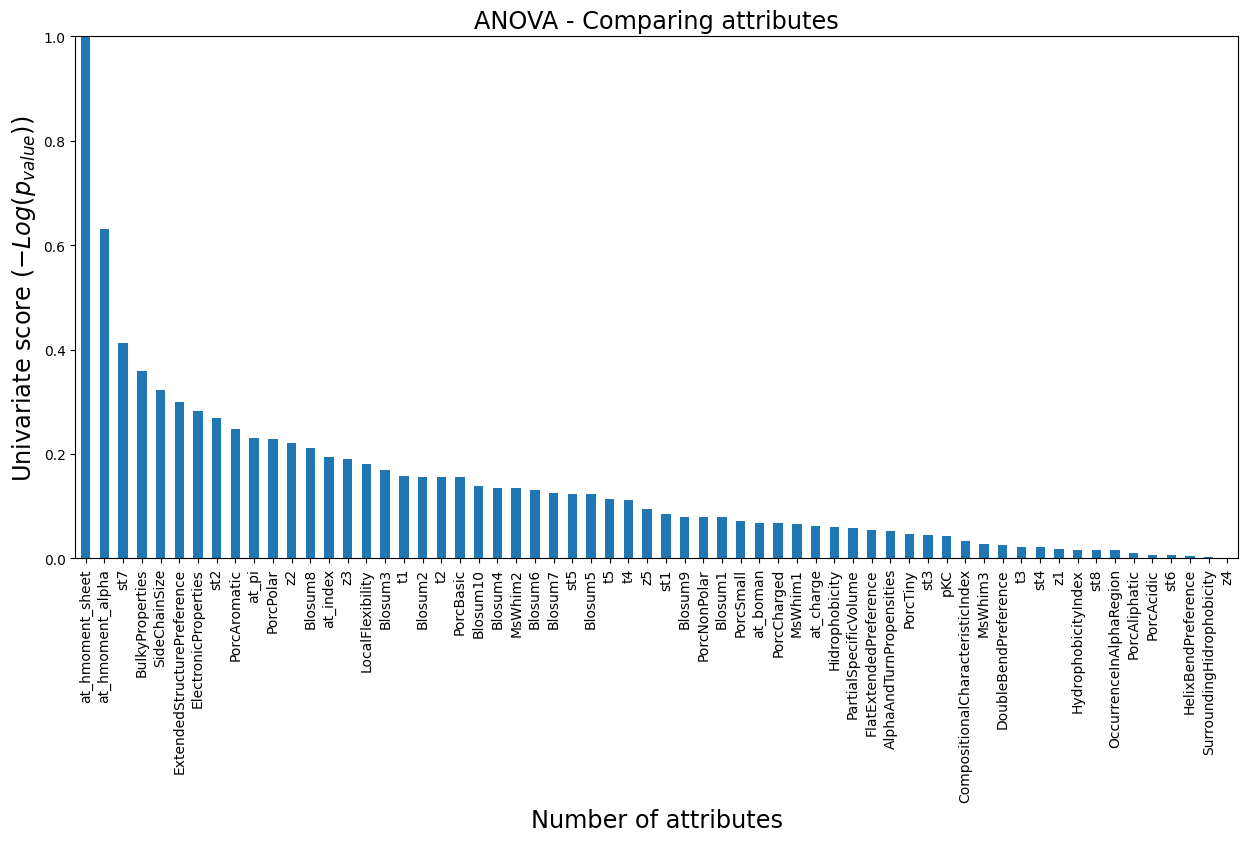

In [59]:
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
X=df_ref[feature_cols]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
V_range = range(0, 62)
asel = SelectKBest(f_classif, k='all')
#asel.fit(X_prandom,Yrandom) #desde valores originales no balanced
asel.fit(X_p,Y)
scores = asel.scores_[asel.get_support()]
total_f_reg=-np.log10(asel.pvalues_)
total_f_reg /= total_f_reg.max()
names_scores = zip(feature_cols, total_f_reg)
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_reg_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_reg_Scores', 'Feat_names'], ascending = [False, True])
amask_att = asel.get_support()
amask_att
hola = X.columns[amask_att]
X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(15, 9))
#print(list(ns_df_sorted['F_reg_Scores']))
#print(list(ns_df_sorted['Feat_names']))

plt.xticks(X_indices,ns_df_sorted['Feat_names'],rotation=90)
plt.bar(X_indices, ns_df_sorted['F_reg_Scores'], label="Regression($-Log(p_{value})$)",width=0.5)
#plt.axhline(y=0.05, xmin=0.0, xmax=3.5, color='red')
plt.title("ANOVA - Comparing attributes",fontsize='xx-large')
plt.xlabel("Number of attributes",fontsize='xx-large')
plt.ylabel("Univariate score ($-Log(p_{value})$)",fontsize='xx-large')

plt.subplots_adjust(bottom=0.3)
plt.margins(0.005)
plt.ylim(0, 1)
plt.savefig('ANOVA_NegEpi_RefPaper.png')#,pad_inches=1.5)
plt.show()

In [60]:
print(*ns_df_sorted['Feat_names'][0:20], sep = ", ")
print(*ns_df_sorted['F_reg_Scores'], sep = ", ")
#at_hmoment_sheet, st7, at_hmoment_alpha, ExtendedStructurePreference, BulkyProperties, SideChainSize, LocalFlexibility, ElectronicProperties, z5, st2, PorcPolar, PorcAromatic, Blosum6, Blosum8, Blosum7, t2, st5, at_index, z3, Blosum5
#at_hmoment_sheet, at_hmoment_alpha, st7, BulkyProperties, SideChainSize, ExtendedStructurePreference, ElectronicProperties, st2, PorcAromatic, at_pi, PorcPolar, z2, Blosum8, at_index, z3, LocalFlexibility, Blosum3, t1, Blosum2, t2
#1.0, 0.5304740366872163, 0.45652821623962997, 0.42581122637962426, 0.41102086360851803, 0.3466330286318525, 0.32735660245064, 0.326327022891914, 0.2985494000415547, 0.2862778708381009, 0.26652674240619495, 0.24981458468082826, 0.24298759389855196, 0.24284510303107754, 0.24281840900252202, 0.21439162869592787, 0.18871498149868798, 0.18718544794281233, 0.18593604430381258, 0.18537931338580052, 0.18380221863739424, 0.16847761377305773, 0.16406578832128751, 0.1588228254119491, 0.15875045194275103, 0.15151245163295768, 0.1415511908211021, 0.14075918003843324, 0.1334115531576714, 0.11626182059151755, 0.10402227516983573, 0.09754944708894232, 0.09143713667594167, 0.08733045392920549, 0.07825718512913316, 0.07147952997665595, 0.07111916715147554, 0.0640043403009219, 0.06243876700684496, 0.057380834750134856, 0.05692302927266799, 0.05179560094279954, 0.051081227863247265, 0.044773928654828314, 0.04352807547090197, 0.03829217482520279, 0.03319515291677737, 0.03288733310082431, 0.032031024715028666, 0.025522840090586897, 0.025173828518450837, 0.024872647356842744, 0.022442749571134474, 0.017287286215252086, 0.016041131975317983, 0.009428600190525572, 0.008569886866137804, 0.004669135968362142, 0.004532044362171629, 0.0021824113451007795, 0.0003304398176446476, 0.0001128512964622423
#at_hmoment_sheet, st7, at_hmoment_alpha, ExtendedStructurePreference, BulkyProperties, SideChainSize, LocalFlexibility, ElectronicProperties, z5, st2, PorcPolar, PorcAromatic, Blosum6, Blosum8, Blosum7, t2, st5, at_index, z3, Blosum5
#estos son los distintos at_pi, , z2,   Blosum3, t1, Blosum2



at_hmoment_sheet, at_hmoment_alpha, st7, BulkyProperties, SideChainSize, ExtendedStructurePreference, ElectronicProperties, st2, PorcAromatic, at_pi, PorcPolar, z2, Blosum8, at_index, z3, LocalFlexibility, Blosum3, t1, Blosum2, t2
1.0, 0.6306222197012109, 0.41253527118063893, 0.35989313406260254, 0.32333137472845863, 0.30030986131497245, 0.2821430063775086, 0.269041053367018, 0.24894749603041755, 0.23077232485731547, 0.22827651896637344, 0.2219823957579289, 0.21071759460093262, 0.19502044227885126, 0.1913315498780097, 0.18088434898462197, 0.16981291516104868, 0.1574143654961743, 0.15673929045826018, 0.1557404128290908, 0.1553596253601918, 0.1391186128923981, 0.13596051435494477, 0.1351887103823339, 0.13083726184217115, 0.12523947045191836, 0.12430308981870032, 0.12385621544325515, 0.11360648191193551, 0.11235895381267752, 0.0952070600971032, 0.08516941338952448, 0.08005056431887038, 0.07936392648627215, 0.07895244733572815, 0.070923770874608, 0.06825599314919288, 0.06773413887197759, 0

In [67]:
print(list(ns_df_sorted['Feat_names'])
print(*ns_df_sorted['Feat_names'][0:20])
print(list(ns_df_sorted['F_reg_Scores']))

['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi', 'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2', 't2', 'PorcBasic', 'Blosum10', 'Blosum4', 'MsWhim2', 'Blosum6', 'Blosum7', 'st5', 'Blosum5', 't5', 't4', 'z5', 'st1', 'Blosum9', 'PorcNonPolar', 'Blosum1', 'PorcSmall', 'at_boman', 'PorcCharged', 'MsWhim1', 'at_charge', 'Hidrophobicity', 'PartialSpecificVolume', 'FlatExtendedPreference', 'AlphaAndTurnPropensities', 'PorcTiny', 'st3', 'pKC', 'CompositionalCharacteristicIndex', 'MsWhim3', 'DoubleBendPreference', 't3', 'st4', 'z1', 'HydrophobicityIndex', 'st8', 'OccurrenceInAlphaRegion', 'PorcAliphatic', 'PorcAcidic', 'st6', 'HelixBendPreference', 'SurroundingHidrophobicity', 'z4']
at_hmoment_sheet at_hmoment_alpha st7 BulkyProperties SideChainSize ExtendedStructurePreference ElectronicProperties st2 PorcAromatic at_pi PorcPol

at_hmoment_sheet
range(0, 62)
['at_hmoment_sheet']
['at_hmoment_sheet', 'at_hmoment_alpha']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 'ExtendedStructurePreference']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 'ExtendedStructurePreference', 'ElectronicProperties']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 'ExtendedStructurePreference', 'ElectronicProperties', 'st2']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic']
['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 'ExtendedStructurePreference', 'ElectronicProperties', 'st2', '

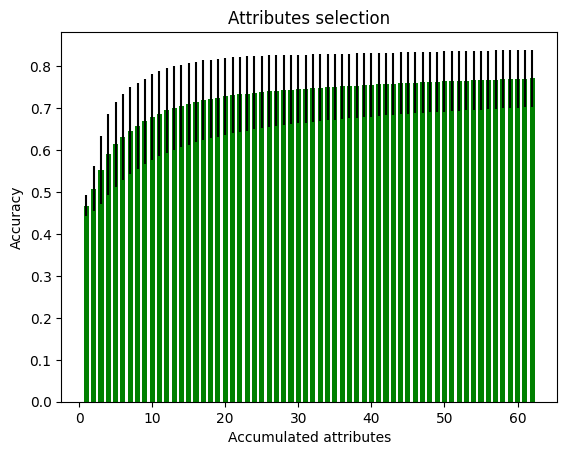

In [73]:
feature_coll = list(ns_df_sorted['Feat_names'])#['PorcAliphatic', 'z1', 'OccurrenceInAlphaRegion', 'SurroundingHidrophobicity', 't4', 'PartialSpecificVolume', 'PorcAcidic', 'pKC', 'PorcAromatic', 'Blosum1', 'st6', 'Blosum6', 'z5', 'at_charge', 'st5', 'Blosum2', 'st3', 'PorcBasic', 'MsWhim1', 'PorcSmall', 'Blosum7', 'FlatExtendedPreference', 'at_hmoment_sheet', 'st1', 'PorcNonPolar', 'at_boman', 't1', 'Blosum5', 'st2', 'LocalFlexibility', 'at_index', 'ElectronicProperties', 'Blosum10', 'at_pi', 'ExtendedStructurePreference', 'Blosum3', 'Hidrophobicity', 'z2', 'st7', 'PorcPolar', 'CompositionalCharacteristicIndex', 'MsWhim2', 'Blosum8', 'HelixBendPreference', 'st4', 'at_hmoment_alpha', 'MsWhim3', 'PorcTiny', 'st8', 'Blosum9', 'AlphaAndTurnPropensities', 't3', 'BulkyProperties']#list(ns_df_sorted['Feat_names'])
print(feature_coll[0])
graph_acc=[]
V_range = range(0, 62) #
print(V_range) #62 1,63*
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
fc = []
W_range = range(0, 100)
for k in V_range: #atributos
    fc.append(feature_coll[k])
    #print(feature_coll[fc].head(0))
    print(fc)
    for l in W_range: #100 veces
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74]
        df3=df_ref.iloc[0:256,0:74] 
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.2)#,random_state=123)
        #X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20,random_state=123)
        RF = RandomForestClassifier(random_state=123)#,n_estimators=1000)
        RF.fit(X_train, y_train)
        y_pred = RF.predict(X_test)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))
rango=[]
for i in V_range:
    rango.append(i+1)
import matplotlib.pyplot as plot
plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Accumulated attributes')
plt.title('Attributes selection')
plt.savefig('AccurracyANOVA_NegEpipaper.png')
plt.show()

SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.647864077669903, 0.6323300970873786, 0.7768932038834951, 0.7128155339805825] [0.05290781130715581, 0.04301869331304001, 0.04278415070679076, 0.04852776437817227]
[0.7277030006610008, 0.9136033108580061, 0.7779505824051072, 0.6477498109803257] [0.08003196741071084, 0.03304093337164725, 0.06160534798555939, 0.10471442111513996]
[0.6306670136682195, 0.582222789599659, 0.7864920557201326, 0.756073684643992] [0.06980020279484256, 0.051785204251875945, 0.06138760629625528, 0.08481970601141671]


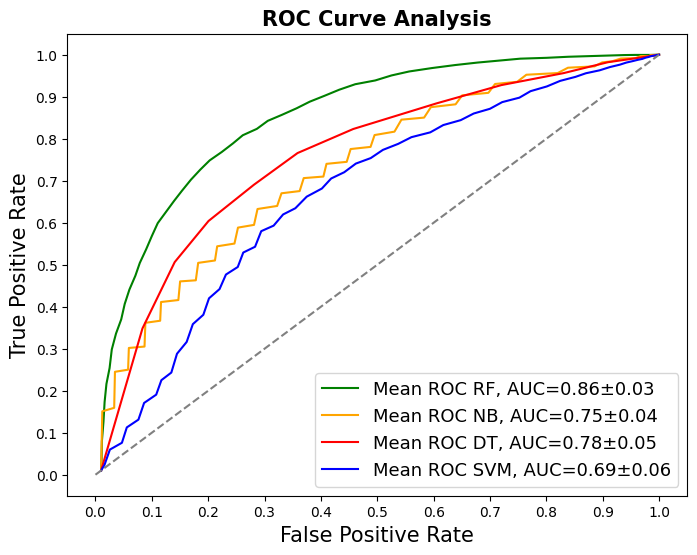

In [74]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(var_smoothing=1e-9),
               RandomForestClassifier(random_state=123),#,n_estimators=1000),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
#feature_coll = ['at_hmoment_sheet', 'Blosum4', 'st7', 'at_hmoment_alpha', 't3', 'pKC', 'PorcAromatic', 't2', 'PartialSpecificVolume', 'Blosum8', 'HelixBendPreference', 'AlphaAndTurnPropensities', 't4', 'PorcSmall', 'Blosum10', 'z3', 'z4', 'at_boman', 'Blosum9', 'MsWhim3', 'PorcTiny', 'Blosum3', 'MsWhim1', 'PorcCharged', 'st3', 'PorcAcidic', 't5', 'LocalFlexibility', 'ExtendedStructurePreference', 'st2', 'Hidrophobicity', 'Blosum6', 'OccurrenceInAlphaRegion', 'Blosum2', 'Blosum1', 'DoubleBendPreference', 'SideChainSize', 'st6', 't1', 'st8', 'PorcBasic', 'z2', 'PorcNonPolar', 'PorcAliphatic', 'CompositionalCharacteristicIndex', 'at_charge', 'st5', 'z1', 'at_pi', 'MsWhim2', 'SurroundingHidrophobicity', 'st4', 'HydrophobicityIndex', 'z5', 'BulkyProperties', 'st1', 'ElectronicProperties', 'at_index', 'Blosum5', 'PorcPolar', 'Blosum7', 'FlatExtendedPreference']
graph_acc = [];Acc = [];Rec = [];Pre = [];acc = [];rec = [];
pre = [];acc_std = [];rec_std = [];pre_std = [];Std = [];
Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];mean_tpr=[];

W_range = range(0, 100)
X_range = range(0, 400, 100)
Y_range = range(0, 100,1)
#fc1=ns_df_sorted['Feat_names'][0:20]
#fc1=['at_hmoment_sheet', 'st7', 'at_hmoment_alpha', 'ExtendedStructurePreference', 'BulkyProperties', 'SideChainSize', 
#     'LocalFlexibility', 'ElectronicProperties', 'z5', 'st2', 'PorcPolar', 'PorcAromatic', 'Blosum6', 'Blosum8', 'Blosum7', 
#     't2', 'st5', 'at_index', 'z3', 'Blosum5']
fc1=list(ns_df_sorted['Feat_names'][0:20])
for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:
        fpr_all=[]
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74] #0:62
        df3=df_ref.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc1]
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        
        #X_train, X_test, y_train, y_test = train_test_split(Xprandom,Yrandom, test_size=0.2)#,random_state=123)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)
        model = cls.fit(X_train, y_train)
        #print(cls.predict(X))
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   
##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)
fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_ANOVANegEpipaper-r256-256.png')
plt.show()

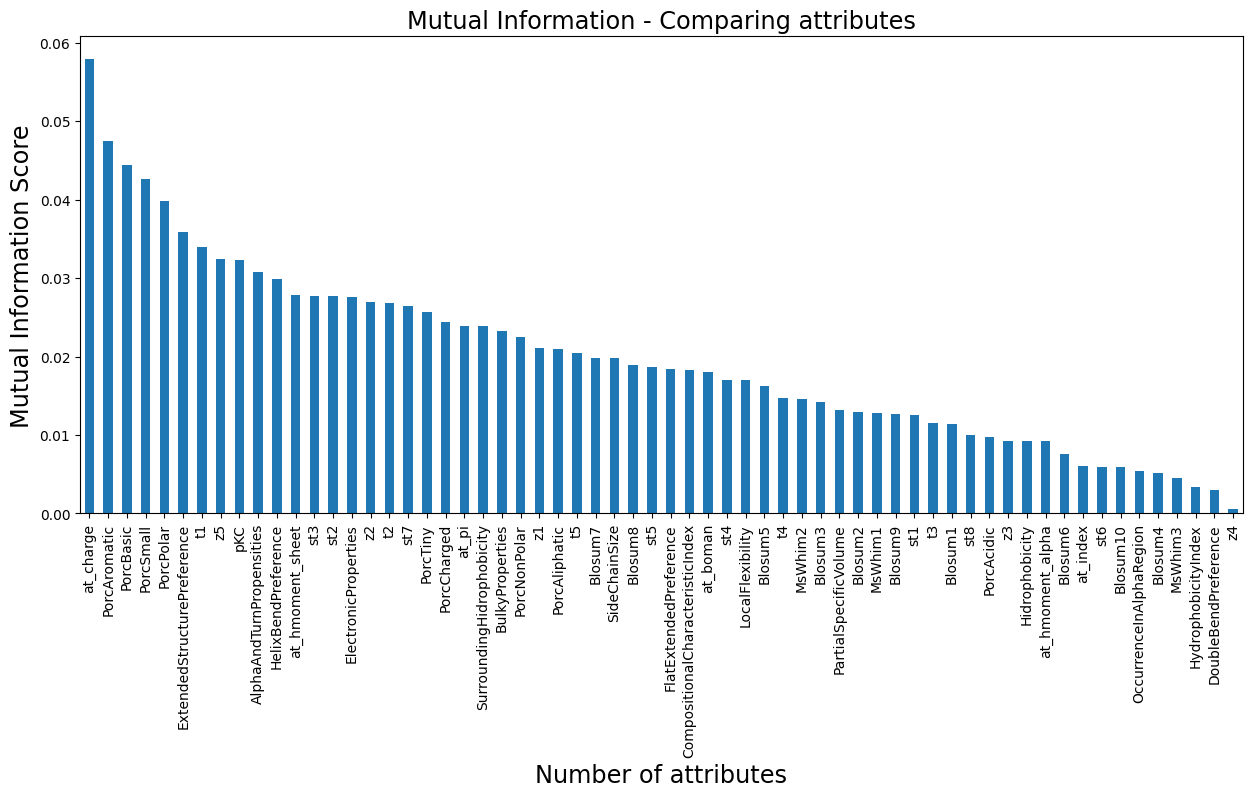

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X_p,Y,test_size=0.2)#,random_state=123)
#X_train,X_test,y_train,y_test=train_test_split(X_prandom,Yrandom,test_size=0.2)#,random_state=123)
mutual_info = mutual_info_classif(X_train, y_train)#,random_state=123)
mutual_info = pd.Series(mutual_info)
mutual_info.index = feature_cols
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 9))

sel = SelectKBest(mutual_info_classif, k='all')
mi=sel.fit(X_train, y_train)
mutual_info.index[sel.get_support()]
plt.subplots_adjust(bottom=0.35)

plt.title("Mutual Information - Comparing attributes",fontsize='xx-large')
plt.xlabel("Number of attributes",fontsize='xx-large')
plt.ylabel("Mutual Information Score",fontsize='xx-large')
plt.savefig('MutualInfo_NegEpipaper.png',pad_inches=1.5)

In [83]:
print(*mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20],sep = ", ")
print(*mutual_info.sort_values(ascending=False))
print(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:12])
#st3, HelixBendPreference, st1, Blosum5, Blosum1, PorcAromatic, AlphaAndTurnPropensities, st7, SurroundingHidrophobicity, PorcBasic, at_charge, Blosum8, at_hmoment_sheet, MsWhim2, Blosum3, PorcSmall, st5, t2, Blosum2, PorcTiny
# PorcPolar, PorcNonPolar, ExtendedStructurePreference, t1, st2, SideChainSize, Blosum4, at_boman


at_charge, PorcAromatic, PorcBasic, PorcSmall, PorcPolar, ExtendedStructurePreference, t1, z5, pKC, AlphaAndTurnPropensities, HelixBendPreference, at_hmoment_sheet, st3, st2, ElectronicProperties, z2, t2, st7, PorcTiny, PorcCharged
0.057885377891263134 0.04746032641377651 0.04439798185442134 0.042658325466836455 0.03982079037121222 0.035834479269833075 0.034016513907693335 0.03246882554834141 0.03230091649027855 0.030712081493643018 0.029836347390091777 0.027845937082682903 0.02772485810796743 0.027672053653777784 0.02756621322159858 0.026893132083673388 0.026836886970438067 0.026458485929226505 0.025623146482982584 0.02435017547965801 0.02389426609974077 0.02387466269147609 0.02331125194098127 0.022441113405823776 0.021120989122538347 0.02091570153608502 0.020394551570243724 0.01983388005948261 0.019832989415443425 0.018933334042988026 0.018683485619890083 0.01841797822338931 0.01828231737213204 0.018071748262362686 0.017005836473764857 0.016943889074170215 0.016266332339225587 0.0146

Index(['at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall', 'PorcPolar',
       'ExtendedStructurePreference', 't1', 'z5', 'pKC',
       'AlphaAndTurnPropensities', 'HelixBendPreference', 'at_hmoment_sheet',
       'st3', 'st2', 'ElectronicProperties', 'z2', 't2', 'st7', 'PorcTiny',
       'PorcCharged', 'at_pi', 'SurroundingHidrophobicity', 'BulkyProperties',
       'PorcNonPolar', 'z1', 'PorcAliphatic', 't5', 'Blosum7', 'SideChainSize',
       'Blosum8', 'st5', 'FlatExtendedPreference',
       'CompositionalCharacteristicIndex', 'at_boman', 'st4',
       'LocalFlexibility', 'Blosum5', 't4', 'MsWhim2', 'Blosum3',
       'PartialSpecificVolume', 'Blosum2', 'MsWhim1', 'Blosum9', 'st1', 't3',
       'Blosum1', 'st8', 'PorcAcidic', 'z3', 'Hidrophobicity',
       'at_hmoment_alpha', 'Blosum6', 'at_index', 'st6', 'Blosum10',
       'OccurrenceInAlphaRegion', 'Blosum4', 'MsWhim3', 'HydrophobicityIndex',
       'DoubleBendPreference', 'z4'],
      dtype='object')
Empty DataFrame
Columns: [a

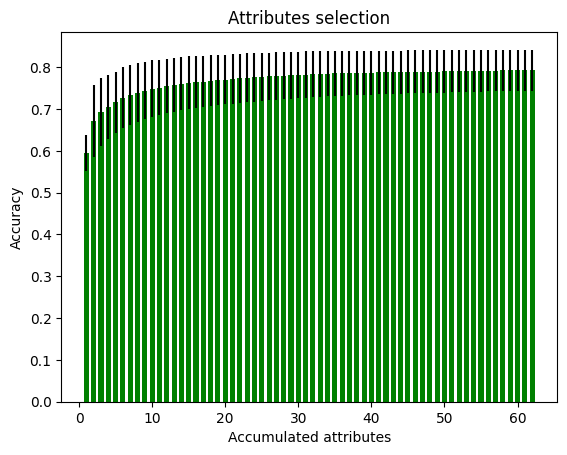

In [85]:
graph_acc=[]
V_range = range(0, 62)
W_range = range(0, 100)
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
fc = []
feature_col = mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()]
print(feature_col)
for k in V_range: #veces de atributo
    fc.append(feature_col[k])
    print(df_ref[fc].head(0))
    for l in W_range:
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74] #0:62
        df3=df_ref.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc]
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)
        RF=RandomForestClassifier(random_state=123)#,n_estimators=1000)
        RF.fit(X_train,y_train)
        y_pred = RF.predict(X_test)
        holi=metrics.accuracy_score(y_test, y_pred)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    #print(np.mean(Acc))
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))
rango=[]
#print(graph_acc)
for i in V_range:
    rango.append(i+1)
    
import matplotlib.pyplot as plot

plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Accumulated attributes')
plt.title('Attributes selection')
plt.savefig('AccuracyMutualInfo_NegEpipaper.png')
plt.show()


SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=50, random_state=123)
[0.6845631067961163, 0.7230097087378641, 0.7984466019417475, 0.7240776699029127] [0.04565161693889537, 0.045381573659641086, 0.03593859511070842, 0.04696822076575045]
[0.7417301275652364, 0.8191345433280975, 0.7922262799949154, 0.6944858680474691] [0.06269906476808056, 0.0517731219597942, 0.06115061132902484, 0.07313272130847141]
[0.6714775523244948, 0.687359725437884, 0.8046612527351563, 0.7399979470298844] [0.061089843521965476, 0.06055044412709939, 0.05662901132312739, 0.06509942169548599]


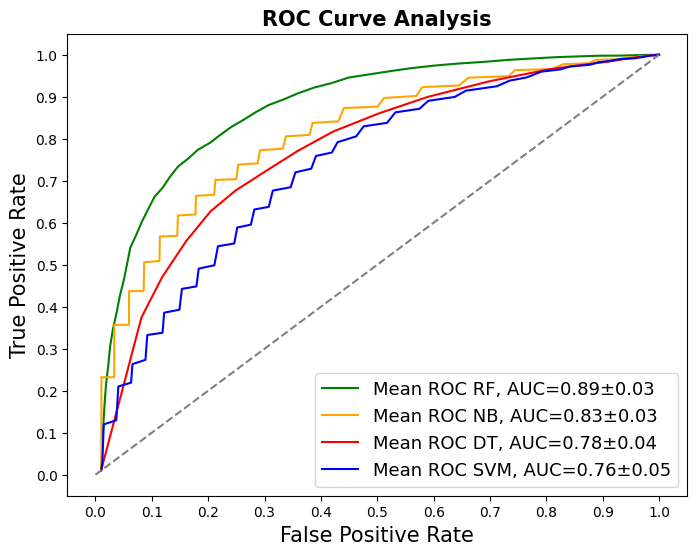

In [86]:
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(),
               RandomForestClassifier(random_state=123),#,n_estimators=1000),#,n_estimators=100,class_weight="balanced"),
               DecisionTreeClassifier(random_state=123,min_samples_split=50)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
##MUTUALINFO

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];
mean_tpr=[]

W_range = range(0, 100)
X_range = range(0, 400, 100)
Y_range = range(0, 100,1)

#mutual=['st3', 'at_hmoment_sheet', 'Blosum1', 'PorcAromatic', 'Blosum2', 'at_charge', 'PorcBasic', 
#        'SurroundingHidrophobicity', 'AlphaAndTurnPropensities', 'HelixBendPreference', 'st1', 'st5', 
#        'ElectronicProperties', 'FlatExtendedPreference', 'ExtendedStructurePreference', 'PorcSmall', 
#        'SideChainSize', 'LocalFlexibility', 'PorcNonPolar', 'PorcAcidic']
mutual=mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20]
for cls in classifiers:
    print(cls)
    for i in W_range: 
        fpr_all=[]
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74] #0:62
        df3=df_ref.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[mutual]
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)#,random_state=123)
        model = cls.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)
###########
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_MUTUAL-INFO_NegEpipaper-r256-256.png')
plt.show()  

In [93]:
#print(*fc1,sep=",")
#print(*fc2,sep=",")
#print(*ns_df_sorted['Feat_names'][0:20],sep = ", ")
#print(*mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20], sep=", ")
x=list(ns_df_sorted['Feat_names'][0:20])
y=list(mutual_info.sort_values(ascending=False).index[sel_five_cols.get_support()][0:20])
fc_merge=x+y
print(fc_merge)

['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi', 'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2', 't2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall', 'PorcPolar', 'ExtendedStructurePreference', 't1', 'z5', 'pKC', 'AlphaAndTurnPropensities', 'HelixBendPreference', 'at_hmoment_sheet', 'st3', 'st2', 'ElectronicProperties', 'z2', 't2', 'st7', 'PorcTiny', 'PorcCharged']


SVC(probability=True, random_state=123)
GaussianNB()
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=50, random_state=123)
[0.6968932038834952, 0.7082524271844659, 0.7953398058252428, 0.7162135922330095] [0.03813890799615065, 0.046791181305246246, 0.04063034298920563, 0.048229175308400776]
[0.7528543837306089, 0.8382744595686417, 0.8070489864483916, 0.6612971976263096] [0.059335283637649415, 0.05045048230736983, 0.06322493296864685, 0.0852528507333583]
[0.6742513770896307, 0.6689139695258572, 0.7909732227076958, 0.7474124033095592] [0.05458736644162395, 0.05844630569060817, 0.058505144557865686, 0.06650232816133228]


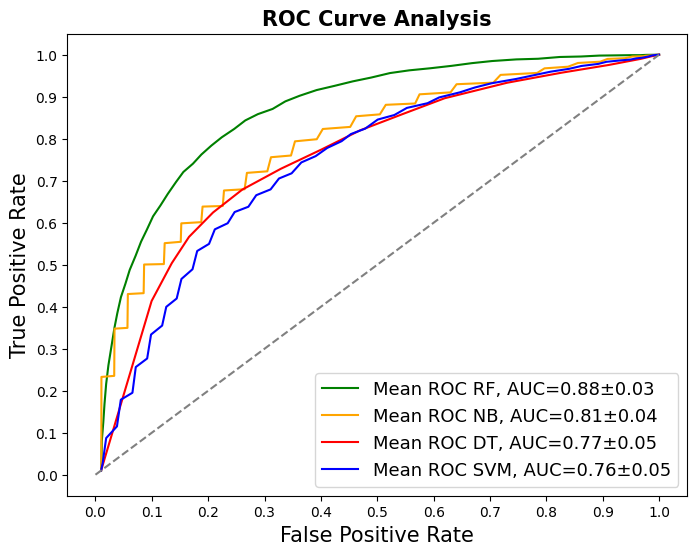

In [100]:
#mix
classifiers = [SVC(random_state=123, probability=True),
               GaussianNB(),
               RandomForestClassifier(random_state=123),#,n_estimators=1000),#,n_estimators=100,class_weight="balanced"),
               DecisionTreeClassifier(random_state=123,min_samples_split=50)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
##MUTUALINFO

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = [];Auc4 = [];fc = [];
mean_tpr=[]

W_range = range(0, 100)
X_range = range(0, 400, 100)
Y_range = range(0, 100,1)
#fc3=fc_merge
fc3=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 
     'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi',
     'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2',
     't2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall','z5', 'pKC',
     'AlphaAndTurnPropensities', 'HelixBendPreference', 'st3', 'PorcTiny', 'PorcCharged']

for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:   #repeticiones
        fpr_all=[]
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,256),0:74] #0:62
        #print(df2)
        df3=df_ref.iloc[0:256,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc3]
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20)#,random_state=123)
        model = cls.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)
###########
plt.figure(figsize=(8,6))
clasif = ["SVM","NB","RF","DT"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_MIXNegEpipaper.png')
plt.show() 